In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
from sklearn.preprocessing import LabelEncoder 

In [3]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
df = pd.read_csv('bankruptcy-prevention.csv',delimiter=';')

In [5]:
df.sample(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
209,0.0,0.0,0.5,1.0,1.0,1.0,non-bankruptcy
66,0.5,0.5,0.0,0.0,0.0,1.0,bankruptcy
146,0.5,0.5,0.5,1.0,0.5,0.0,non-bankruptcy
22,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
30,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
65,0.5,0.5,0.0,0.0,0.0,1.0,bankruptcy
70,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
189,0.5,0.0,1.0,1.0,1.0,0.0,non-bankruptcy
200,0.5,0.5,0.0,1.0,1.0,0.0,non-bankruptcy
19,0.0,0.5,0.0,0.0,0.0,0.5,bankruptcy


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [7]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                     object
dtype: object

In [9]:
df.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [10]:
df.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [11]:
df.rename(columns={' management_risk':'management_risk', ' financial_flexibility':'financial_flexibility',
       ' credibility':'credibility', ' competitiveness':'competitiveness', ' operating_risk':'operating_risk',
                   ' class':'class'},inplace=True)

<AxesSubplot:xlabel='class', ylabel='count'>

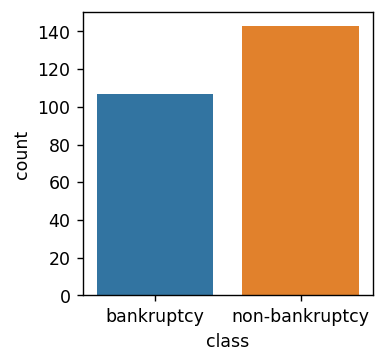

In [12]:
plt.figure(figsize=(3,3),dpi=125)
sns.countplot(x= df['class'])

In [13]:
df['class'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64

In [14]:
df['class'] = df[['class']].apply(LabelEncoder().fit_transform)

<AxesSubplot:>

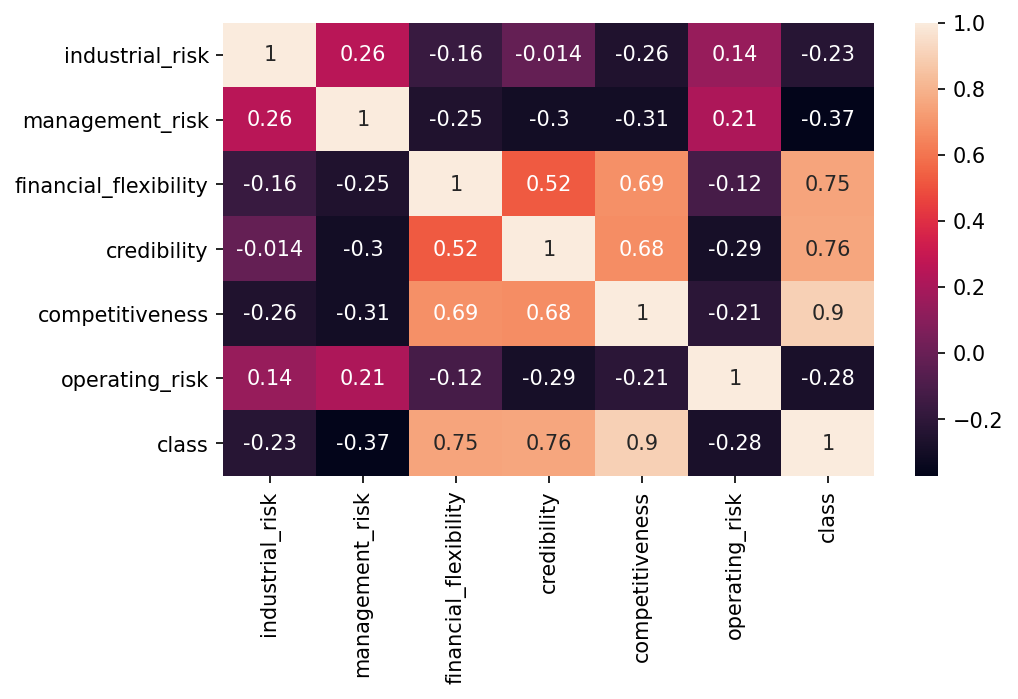

In [15]:
plt.figure(figsize=(7,4),dpi=150)
sns.heatmap(df.corr(),annot=True)

<Figure size 900x900 with 0 Axes>

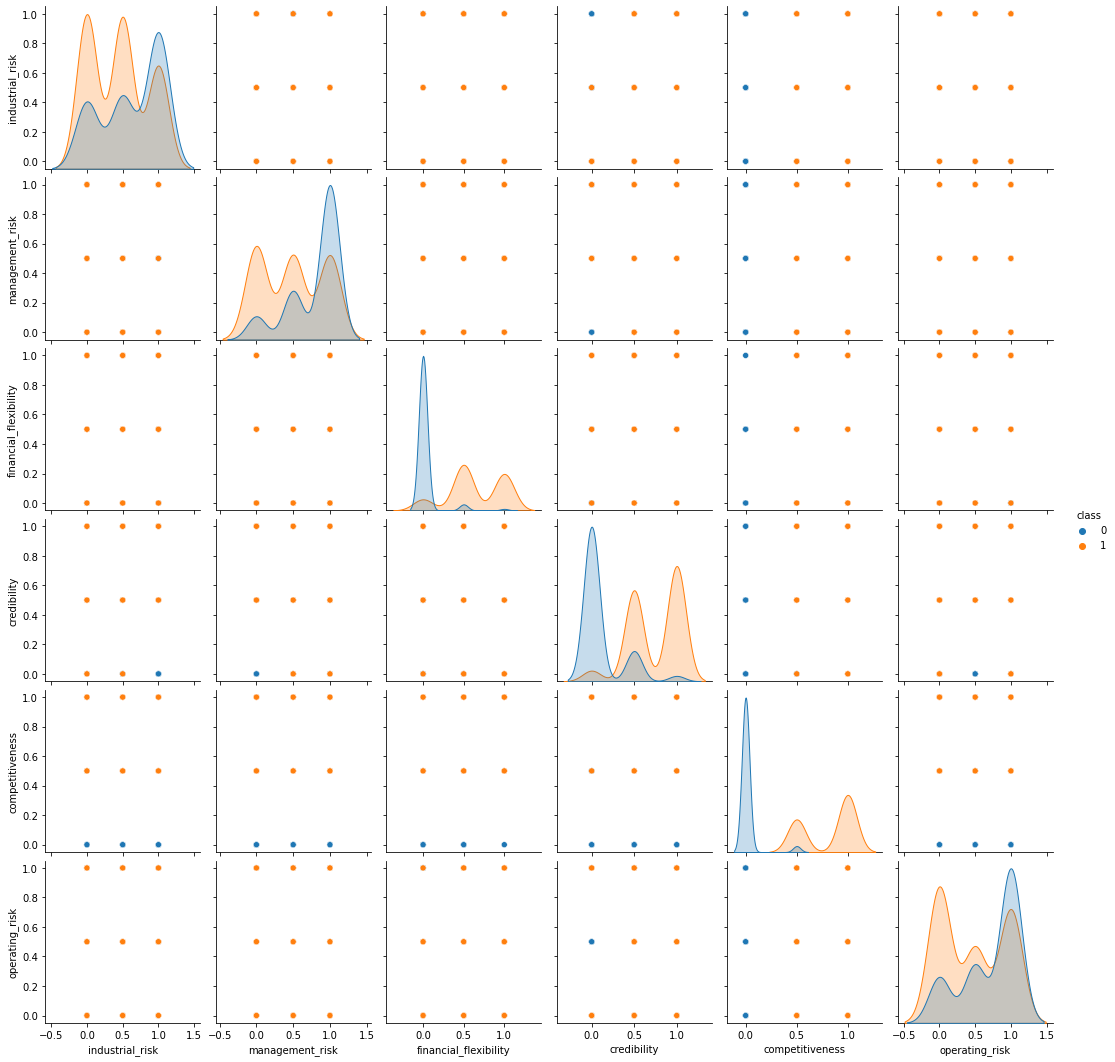

In [16]:
plt.figure(figsize=(6,6),dpi=150)
sns.pairplot(df,hue='class')

#### According to the data we have,
When competitiveness of the business was 0 (very low) it is certain to go bankrupt.
Also if the competitiveness of the business was 1 (very high) it won't go bankrupt.

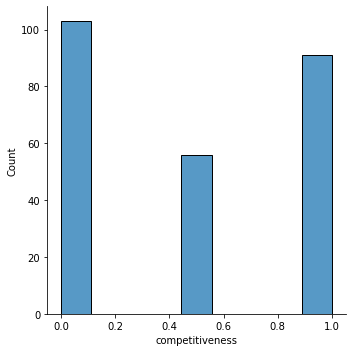

In [17]:
sns.displot(data=df,x='competitiveness',)

### Feature engineering

#### Based on correlation & distribution plots

In [18]:
X = df.drop(['industrial_risk','management_risk','operating_risk','class'],axis=1)
y = df['class']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
svc = SVC()
param_grid = {'C':[0.01,0.1,0.5,1,0.25,2,5,10,15,18,20,23,25,30],
              'kernel':['linear','rbf'],
              'gamma': [50,5,10,0.5]}

In [21]:
grid_model = GridSearchCV(svc,param_grid)

In [22]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 0.25, 2, 5, 10, 15, 18, 20,
                               23, 25, 30],
                         'gamma': [50, 5, 10, 0.5],
                         'kernel': ['linear', 'rbf']})

In [23]:
print(grid_model.best_params_)
print(grid_model.best_score_)

{'C': 10, 'gamma': 50, 'kernel': 'linear'}
1.0


In [24]:
y_pred = grid_model.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.98      0.99        52

    accuracy                           0.99        83
   macro avg       0.98      0.99      0.99        83
weighted avg       0.99      0.99      0.99        83



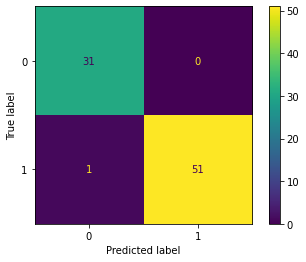

In [26]:
cm = confusion_matrix(y_test, y_pred)
cfx = ConfusionMatrixDisplay(confusion_matrix=cm)
cfx.plot()

#### PCA

In [27]:
from sklearn.decomposition import PCA

In [28]:
exp_var = []

for n in range(1,8):
    pca = PCA(n_components=n)
    pca.fit(df)
    
    exp_var.append(np.sum(pca.explained_variance_ratio_))

In [29]:
explained_variance = pd.DataFrame(data=exp_var,index=range(1,8))
explained_variance

,0
1,0.524751
2,0.674434
3,0.801792
4,0.897515
5,0.951090
6,0.986304
7,1.000000


### Logistic regression 

In [30]:
from sklearn.linear_model import LogisticRegressionCV

In [31]:
log_model = LogisticRegressionCV()

In [32]:
log_model.fit(X_train,y_train)

LogisticRegressionCV()

In [33]:
prd = log_model.predict(X_test)

In [34]:
print(classification_report(y_test,prd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        52

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



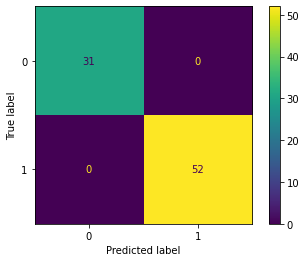

In [35]:
cm = confusion_matrix(y_test, prd)
cfx = ConfusionMatrixDisplay(confusion_matrix=cm)
cfx.plot()

In [36]:
df1 = pd.DataFrame(df[['credibility','financial_flexibility','competitiveness','class']])

In [37]:
df1

,credibility,financial_flexibility,competitiveness,class
0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0
3,0.5,0.0,0.0,0
4,0.0,0.0,0.0,0
...,...,...,...,...
245,1.0,1.0,1.0,1
246,1.0,0.5,1.0,1
247,0.5,1.0,0.5,1
248,1.0,0.5,0.5,1


In [38]:
X1 = df1.drop('class',axis=1)
y1 = df1['class']

In [39]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [40]:
log_1_model = LogisticRegressionCV()

In [41]:
log_1_model.fit(X_1_train,y_1_train)

LogisticRegressionCV()

In [42]:
pred_1 = log_1_model.predict(X_1_test)

In [43]:
print(classification_report(y_1_test,pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        52

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



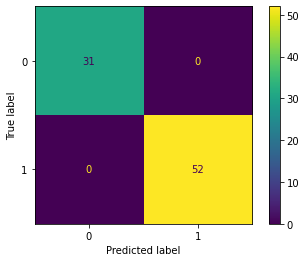

In [44]:
cm = confusion_matrix(y_test, pred_1)
cfx = ConfusionMatrixDisplay(confusion_matrix=cm)
cfx.plot()

In [45]:
df3 = X_1_test

In [46]:
df3['Class'] = y_1_test
df3['Predicted Class'] = pred_1

In [47]:
df3.sample(15)

,credibility,financial_flexibility,competitiveness,Class,Predicted Class
172,1.0,0.0,1.0,1,1
245,1.0,1.0,1.0,1,1
108,0.5,0.5,0.5,1,1
180,0.5,0.5,1.0,1,1
184,1.0,0.5,0.5,1,1
75,0.0,0.0,0.0,0,0
142,1.0,1.0,0.5,1,1
97,0.5,0.0,0.0,0,0
96,0.0,0.0,0.0,0,0
5,0.5,0.0,0.0,0,0


In [49]:
#drp = df.loc[df.duplicated(subset=['industrial_risk','management_risk','financial_flexibility','credibility',
#'competitiveness','operating_risk']),:]

In [ ]:
#df1 = df.drop(index=drp.index[100:])

<AxesSubplot:xlabel='Class', ylabel='count'>

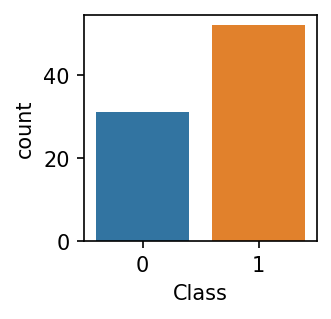

In [50]:
plt.figure(figsize=(2,2),dpi=150)
sns.countplot(x= df3['Class'])